#### Delhi Weather Data

#### Problem Statement:- To Predict Delhi Temperature using Time-Series Forecasting

#### Importing Libraries

In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [255]:
%pwd

'C:\\Users\\nsidd\\Mechademy'

In [390]:
data = pd.read_csv("Weather_data.csv")
data.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [391]:
# Correlation
data.corr()

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
_dewptm,1.000000,-0.217708,0.003413,0.446475,0.322672,NaN,-0.003957,0.144309,0.004127,0.526573,0.068251,-0.000202,0.009968,-0.155037,-0.091088,0.343063,-0.006551
_fog,-0.217708,1.000000,-0.003075,-0.003738,0.371432,NaN,-0.000867,-0.044250,-0.000853,-0.447652,-0.026073,-0.001206,-0.022375,-0.095297,NaN,-0.021772,-0.098586
_hail,0.003413,-0.003075,1.000000,NaN,0.007675,NaN,-0.000034,-0.001892,-0.000036,-0.003086,0.108780,-0.000052,-0.000484,0.005374,-0.003162,NaN,0.003035
_heatindexm,0.446475,-0.003738,NaN,1.000000,-0.046198,NaN,-0.002928,-0.076245,NaN,0.726055,-0.049084,0.002152,-0.002258,0.104908,-0.131196,NaN,0.069866
_hum,0.322672,0.371432,0.007675,-0.046198,1.000000,NaN,-0.005780,0.173848,0.004464,-0.584514,0.073080,-0.000907,-0.024524,-0.338901,0.055982,-0.044464,-0.228446
_precipm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_pressurem,-0.003957,-0.000867,-0.000034,-0.002928,-0.005780,NaN,1.000000,-0.000540,-0.000009,0.004697,-0.000333,-0.000013,0.000167,0.004608,-0.005606,-0.014932,-0.000153
_rain,0.144309,-0.044250,-0.001892,-0.076245,0.173848,NaN,-0.000540,1.000000,-0.000525,-0.008103,0.416014,-0.000742,-0.004153,-0.021592,0.138395,NaN,0.034559
_snow,0.004127,-0.000853,-0.000036,NaN,0.004464,NaN,-0.000009,-0.000525,1.000000,0.000159,-0.000309,-0.000014,-0.000065,0.002506,NaN,NaN,0.000433
_tempm,0.526573,-0.447652,-0.003086,0.726055,-0.584514,NaN,0.004697,-0.008103,0.000159,1.000000,0.001045,0.001291,0.032582,0.163152,-0.137500,0.880843,0.224511


In [392]:
data=df.copy()

In [393]:
# Top Rows
df= pd.read_csv("Weather_data.csv")
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [394]:
data.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [505]:
data.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [395]:
#Data Types
df.dtypes

datetime_utc     object
 _conds          object
 _dewptm        float64
 _fog             int64
 _hail            int64
 _heatindexm    float64
 _hum           float64
 _precipm       float64
 _pressurem     float64
 _rain            int64
 _snow            int64
 _tempm         float64
 _thunder         int64
 _tornado         int64
 _vism          float64
 _wdird         float64
 _wdire          object
 _wgustm        float64
 _windchillm    float64
 _wspdm         float64
dtype: object

In [397]:
df.shape #Shape-Rows Vs Columns

(98913, 20)

#### Missing Values

In [398]:
#### Missing Values Column wise
df.isnull().sum()

datetime_utc        0
 _conds            68
 _dewptm          619
 _fog               0
 _hail              0
 _heatindexm    69802
 _hum             753
 _precipm       98913
 _pressurem       231
 _rain              0
 _snow              0
 _tempm           669
 _thunder           0
 _tornado           0
 _vism           4416
 _wdird         14380
 _wdire         14380
 _wgustm        97850
 _windchillm    98340
 _wspdm          2353
dtype: int64

In [399]:
df.isnull().sum().sum()/len(df) #4% of Missing Values Present in the data. 

4.0720026690121625

#### Renaming Columns

In [402]:
df = df.rename(columns={' _conds': 'conds',' _dewptm':'dewptm', ' _fog':'fog', ' _hail':'hail', ' _precipm':'precipm',
       ' _heatindexm':'heatindexm', ' _hum':'hum', ' _pressurem':'pressurem', ' _rain':'rain', ' _snow':'snow', ' _tempm':'tempm',
       ' _thunder':'thunder', ' _tornado':'tornado', ' _vism':'vism', ' _wdird':'wdird', ' _wdire':'wdire', ' _wspdm':'wspdm',' _wgustm':'wgustm',' _windchillm':'windchillm'})

<AxesSubplot:xlabel='tornado', ylabel='count'>

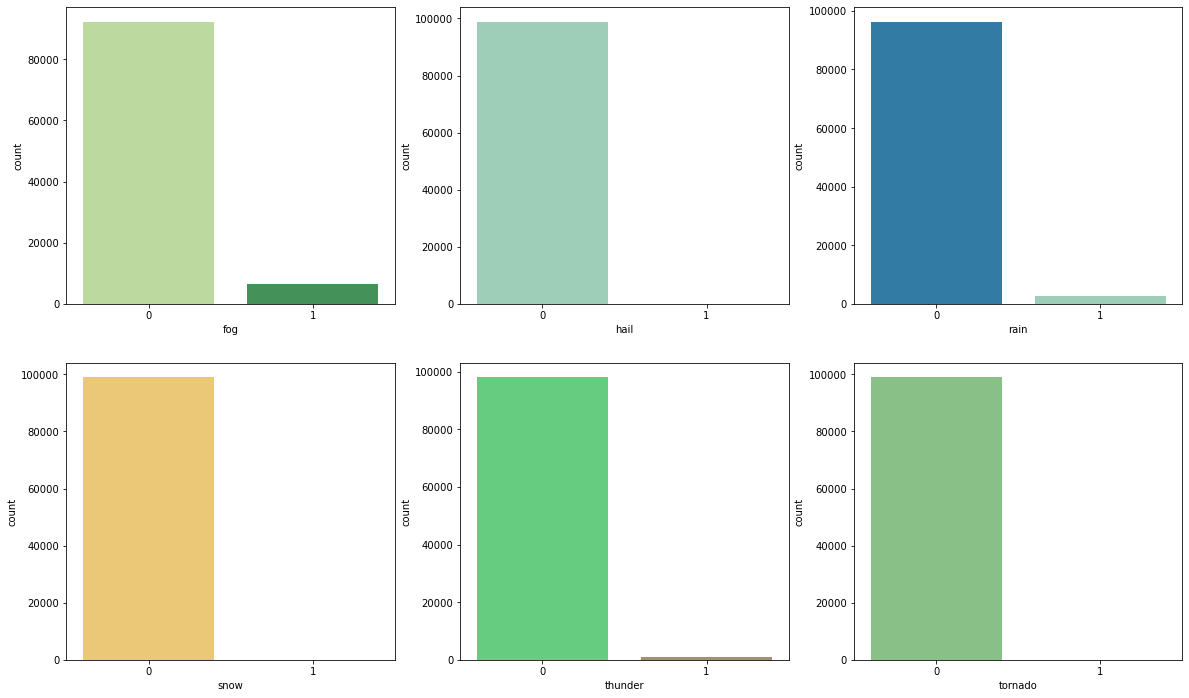

In [403]:
fig,axarr = plt.subplots(2,3,figsize = (20,12))
sns.countplot(df['fog'],ax = axarr[0][0], palette="YlGn")
sns.countplot(df['hail'],ax = axarr[0][1], palette="YlGnBu")
sns.countplot(df['rain'],ax = axarr[0][2], palette = "YlGnBu_r")
sns.countplot(df['snow'],ax = axarr[1][0], palette="YlOrBr")
sns.countplot(df['thunder'],ax = axarr[1][1],palette="terrain")
sns.countplot(df['tornado'],ax = axarr[1][2],palette="Accent")

#### As we can see that most of the values of hail,snow, tornado have high probability of zeros. So, Dropping them doesn't make any difference. 

#### Fog, Rain can be a good feature to predict temperature. 

In [404]:
df.head()

,datetime_utc,conds,dewptm,fog,hail,heatindexm,hum,precipm,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wgustm,windchillm,wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [416]:
df['conds'].fillna(method='ffill',inplace=True) 

In [428]:
df.groupby(['rain'])['conds'].value_counts(normalize=True)

rain  conds                        
0     Haze                             0.487309
      Smoke                            0.211212
      Mist                             0.093590
      Clear                            0.032495
      Widespread Dust                  0.029452
      Fog                              0.026388
      Scattered Clouds                 0.022816
      Partly Cloudy                    0.021435
      Shallow Fog                      0.019306
      Mostly Cloudy                    0.015785
      Partial Fog                      0.010032
      Patches of Fog                   0.008516
      Heavy Fog                        0.004227
      Unknown                          0.003926
      Blowing Sand                     0.003718
      Overcast                         0.003251
      Thunderstorm                     0.001973
      Light Drizzle                    0.001942
      Drizzle                          0.001070
      Light Thunderstorm               0.000654
    

In [451]:
df.groupby(['rain'])['conds'].value_counts(normalize=False)

rain  conds                        
0     Haze                             46924
      Smoke                            20338
      Mist                              9012
      Clear                             3129
      Widespread Dust                   2836
      Fog                               2541
      Scattered Clouds                  2197
      Partly Cloudy                     2064
      Shallow Fog                       1859
      Mostly Cloudy                     1520
      Partial Fog                        966
      Patches of Fog                     820
      Heavy Fog                          407
      Unknown                            378
      Blowing Sand                       358
      Overcast                           313
      Thunderstorm                       190
      Light Drizzle                      187
      Drizzle                            103
      Light Thunderstorm                  63
      Light Fog                           52
      Thunderstorms

<AxesSubplot:title={'center':'Rain vs Weather Condition'}, ylabel='conds,rain'>

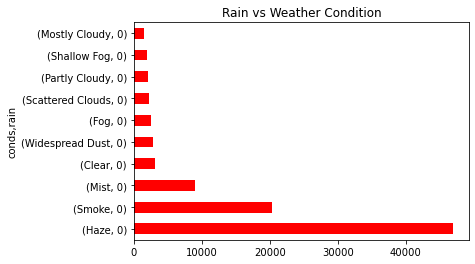

In [453]:
df.groupby(['conds'])['rain'].value_counts().sort_values(ascending = False)[:10].plot(kind = "barh", color = "red", title = "Rain vs Weather Condition")

#### 48% of the times when there's no rain, Delhi is with Haze weather condition which is quite expectable. Followed by Smoke with 21% and rest follows.

#### 49% of the times there's Light rain in Delhi during speified period, followed by 17% Thunderstorms, 14% Rain, etc.

In [439]:
df.groupby(['fog'])['conds'].value_counts(normalize=True)

fog  conds                        
0    Haze                             0.508523
     Smoke                            0.220406
     Mist                             0.097665
     Clear                            0.033899
     Widespread Dust                  0.030734
     Scattered Clouds                 0.023809
     Partly Cloudy                    0.022368
     Mostly Cloudy                    0.016473
     Light Rain                       0.014056
     Thunderstorms and Rain           0.005104
     Light Drizzle                    0.004443
     Rain                             0.004270
     Unknown                          0.004096
     Blowing Sand                     0.003880
     Overcast                         0.003392
     Thunderstorm                     0.002059
     Light Thunderstorms and Rain     0.001842
     Drizzle                          0.001203
     Light Thunderstorm               0.000683
     Heavy Rain                       0.000303
     Heavy Thunderstorms 

In [460]:
df['fog'].value_counts(normalize=True)*100

0    93.289052
1     6.710948
Name: fog, dtype: float64

In [508]:
data.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


#### Almost 6% of times Delhi Weather is accompanied with Fog during mentioned period. 

In [444]:
df.head()

,datetime_utc,conds,dewptm,fog,hail,heatindexm,hum,precipm,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wgustm,windchillm,wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


<AxesSubplot:xlabel='dewptm'>

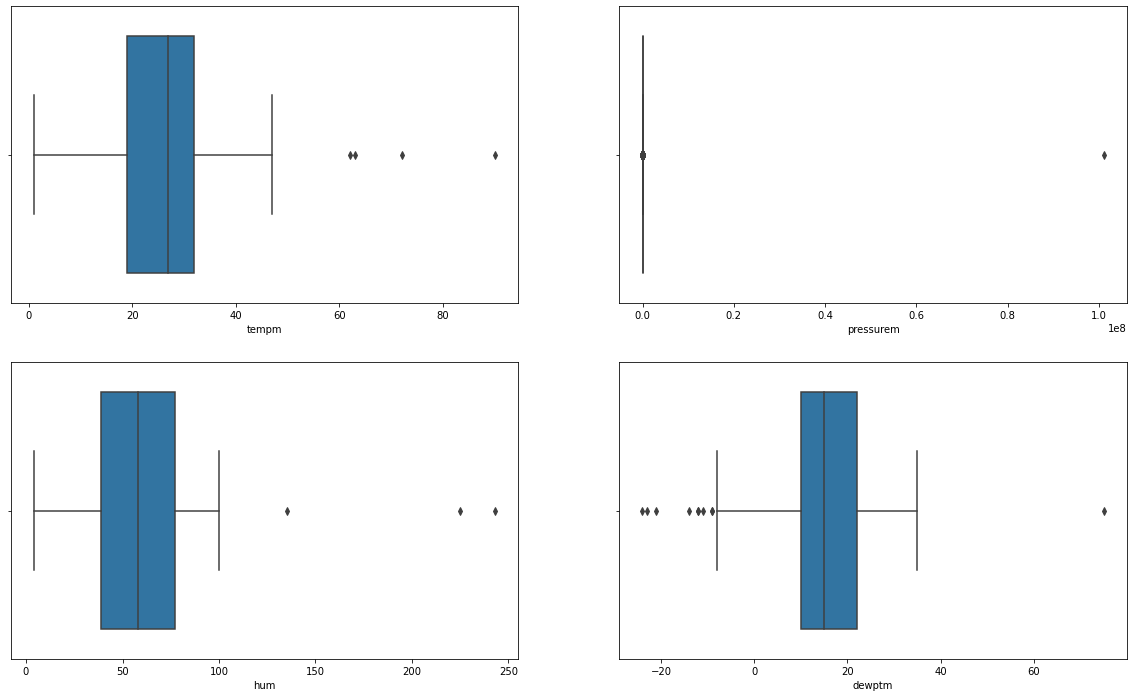

In [465]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.boxplot(x='tempm',data = df, ax=axarr[0][0])
sns.boxplot(x='pressurem', data = df, ax=axarr[0][1])
sns.boxplot(x='hum',data = df, ax=axarr[1][0])
sns.boxplot(x='dewptm', data = df, ax=axarr[1][1])

#### We have few outliers here.

In [466]:
df = df.drop(['heatindexm','precipm','wdird','wdire','wgustm','windchillm','hail','snow','tornado','thunder'],axis = 1)

In [467]:
df.head()

,datetime_utc,conds,dewptm,fog,hum,pressurem,rain,tempm,vism,wspdm
0,19961101-11:00,Smoke,9.0,0,27.0,1010.0,0,30.0,5.0,7.4
1,19961101-12:00,Smoke,10.0,0,32.0,-9999.0,0,28.0,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,44.0,-9999.0,0,24.0,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,41.0,1010.0,0,24.0,2.0,NaN
4,19961101-16:00,Smoke,11.0,0,47.0,1011.0,0,23.0,1.2,0.0


In [468]:
df.columns

Index(['datetime_utc', 'conds', 'dewptm', 'fog', 'hum', 'pressurem', 'rain',
       'tempm', 'vism', 'wspdm'],
      dtype='object')

In [469]:
df['conds'].value_counts()

Haze                             46924
Smoke                            20338
Mist                              9012
Clear                             3129
Widespread Dust                   2836
Fog                               2541
Scattered Clouds                  2197
Partly Cloudy                     2064
Shallow Fog                       1859
Mostly Cloudy                     1520
Light Rain                        1297
Partial Fog                        966
Patches of Fog                     820
Thunderstorms and Rain             471
Light Drizzle                      410
Heavy Fog                          407
Rain                               394
Unknown                            378
Blowing Sand                       358
Overcast                           313
Thunderstorm                       190
Light Thunderstorms and Rain       170
Drizzle                            111
Light Thunderstorm                  63
Light Fog                           52
Heavy Rain               

In [470]:
df['conds'].fillna(method='ffill',inplace=True) 

In [471]:
df.isnull().sum()

datetime_utc       0
conds              0
dewptm           619
fog                0
hum              753
pressurem        231
rain               0
tempm            669
vism            4416
wspdm           2353
dtype: int64

In [472]:
# ValueCounts for Each Column
for col in df.value_counts().sort_values().head().reset_index():
    print(col,'\n')
    display(df.groupby(col).size().reset_index())
    print('--'*50,'\n')

datetime_utc 



,datetime_utc,0
0,19961101-11:00,1
1,19961101-12:00,1
2,19961101-13:00,1
3,19961101-14:00,1
4,19961101-16:00,1
...,...,...
98908,20161130-12:30,1
98909,20161130-13:00,1
98910,20161130-15:00,1
98911,20161130-18:00,1


---------------------------------------------------------------------------------------------------- 

conds 



,conds,0
0,Blowing Sand,358
1,Clear,3129
2,Drizzle,111
3,Fog,2541
4,Funnel Cloud,2
5,Haze,46924
6,Heavy Fog,407
7,Heavy Rain,28
8,Heavy Thunderstorms and Rain,20
9,Heavy Thunderstorms with Hail,1


---------------------------------------------------------------------------------------------------- 

dewptm 



,dewptm,0
0,-24.0,1
1,-23.0,1
2,-21.0,1
3,-14.0,1
4,-12.0,2
5,-11.0,1
6,-9.0,2
7,-8.0,2
8,-7.0,12
9,-6.0,7


---------------------------------------------------------------------------------------------------- 

fog 



,fog,0
0,0,92275
1,1,6638


---------------------------------------------------------------------------------------------------- 

hum 



,hum,0
0,4.0,42
1,5.0,36
2,6.0,48
3,7.0,72
4,8.0,83
...,...,...
95,99.0,140
96,100.0,2882
97,135.0,1
98,225.0,1


---------------------------------------------------------------------------------------------------- 

pressurem 



,pressurem,0
0,-9999.0,749
1,0.0,3
2,2.0,1
3,6.0,1
4,7.0,1
...,...,...
134,11015.0,1
135,11019.0,1
136,11020.0,1
137,101014.0,1


---------------------------------------------------------------------------------------------------- 

rain 



,rain,0
0,0,96292
1,1,2621


---------------------------------------------------------------------------------------------------- 

tempm 



,tempm,0
0,1.0,1
1,3.0,12
2,4.0,43
3,5.0,180
4,6.0,363
5,7.0,727
6,8.0,960
7,9.0,1316
8,10.0,1535
9,11.0,1864


---------------------------------------------------------------------------------------------------- 

vism 



,vism,0
0,0.00,123
1,0.02,84
2,0.05,113
3,0.10,193
4,0.20,671
5,0.30,371
6,0.40,420
7,0.50,2455
8,0.60,611
9,0.70,833


---------------------------------------------------------------------------------------------------- 

wspdm 



,wspdm,0
0,0.0,28884
1,1.9,763
2,3.7,7803
3,5.6,10211
4,7.2,3
...,...,...
84,248.2,1
85,268.5,1
86,999.9,3
87,1492.7,1


---------------------------------------------------------------------------------------------------- 

0 



KeyError: 0

In [473]:
#Imputing with Mean
df['dewptm'].mean()

15.817130241927279

In [474]:
df['dewptm']=df['dewptm'].fillna(15)

In [475]:
df['hum'].mean()

57.774358190709044

In [476]:
df['hum'] = df['hum'].fillna(57.7)

In [477]:
# Dropping Precipm Value 

In [478]:
df.isnull().sum()

datetime_utc       0
conds              0
dewptm             0
fog                0
hum                0
pressurem        231
rain               0
tempm            669
vism            4416
wspdm           2353
dtype: int64

In [479]:
df['pressurem'].mean()

1951.861431669403

In [480]:
#Imputing with Mean
df['pressurem'] = df['pressurem'].fillna(1951)

In [481]:
df.isnull().sum()

datetime_utc       0
conds              0
dewptm             0
fog                0
hum                0
pressurem          0
rain               0
tempm            669
vism            4416
wspdm           2353
dtype: int64

In [482]:
df['tempm'].mean()

25.57842718130369

In [483]:
#Imputing with Mean
df['tempm'] = df['tempm'].fillna(25.5)

In [484]:
df.isnull().sum()

datetime_utc       0
conds              0
dewptm             0
fog                0
hum                0
pressurem          0
rain               0
tempm              0
vism            4416
wspdm           2353
dtype: int64

In [485]:
df['vism'].mode()

0    2.0
dtype: float64

In [486]:
df['vism'].value_counts()

2.00       26772
1.00        8981
3.00        8910
4.00        7375
2.50        6471
3.50        5452
5.00        3244
1.50        2706
2.20        2569
0.50        2455
2.80        2148
1.20        1767
4.50        1571
1.40        1366
1.80        1284
1.60        1086
0.80        1084
6.00         986
0.70         833
1.30         695
2.40         689
0.20         671
1.10         655
0.90         631
0.60         611
1.70         577
0.40         420
2.60         387
0.30         371
7.00         317
2.30         213
0.10         193
2.10         193
2.70         182
8.00         166
0.00         123
0.05         113
0.02          84
1.90          66
2.90          46
9.00          10
10.00         10
50.00          5
55.00          3
5.50           3
18.00          1
60.00          1
6436.00        1
Name: vism, dtype: int64

In [487]:
#Imputing with Mean
df['vism'] = df['vism'].fillna(2.0) 

In [488]:
df.isnull().sum()

datetime_utc       0
conds              0
dewptm             0
fog                0
hum                0
pressurem          0
rain               0
tempm              0
vism               0
wspdm           2353
dtype: int64

In [489]:
df['wspdm'].mean()

7.6858543910511665

In [490]:
df['wspdm'].mode()

0    0.0
dtype: float64

In [491]:
#Imputing with Mean
df['wspdm'] = df['wspdm'].fillna(0.0)

In [492]:
df.isnull().sum()

datetime_utc    0
conds           0
dewptm          0
fog             0
hum             0
pressurem       0
rain            0
tempm           0
vism            0
wspdm           0
dtype: int64

#### Now, we are left with only these missing values and dropping them as we can see these columns have missing values nearly 100%

In [493]:
#### No Missing Values Present
df.isnull().sum()

datetime_utc    0
conds           0
dewptm          0
fog             0
hum             0
pressurem       0
rain            0
tempm           0
vism            0
wspdm           0
dtype: int64

In [494]:
df.describe()

,dewptm,fog,hum,pressurem,rain,tempm,vism,wspdm
count,98913.000000,98913.000000,98913.000000,9.891300e+04,98913.000000,98913.000000,98913.000000,98913.000000
mean,15.812017,0.067109,57.773792,1.951859e+03,0.026498,25.577897,2.401139,7.503019
std,7.074969,0.250213,23.663872,3.213342e+05,0.160612,8.436060,20.497391,11.910152
min,-24.000000,0.000000,4.000000,-9.999000e+03,0.000000,1.000000,0.000000,0.000000
25%,10.000000,0.000000,39.000000,1.002000e+03,0.000000,19.000000,1.600000,0.000000
50%,15.000000,0.000000,58.000000,1.008000e+03,0.000000,27.000000,2.000000,5.600000
75%,22.000000,0.000000,77.000000,1.014000e+03,0.000000,32.000000,3.000000,11.100000
max,75.000000,1.000000,243.000000,1.010614e+08,1.000000,90.000000,6436.000000,1514.900000


In [495]:
df.dtypes

datetime_utc     object
conds            object
dewptm          float64
fog               int64
hum             float64
pressurem       float64
rain              int64
tempm           float64
vism            float64
wspdm           float64
dtype: object

In [496]:
df.columns

Index(['datetime_utc', 'conds', 'dewptm', 'fog', 'hum', 'pressurem', 'rain',
       'tempm', 'vism', 'wspdm'],
      dtype='object')

In [497]:
df.head()

,datetime_utc,conds,dewptm,fog,hum,pressurem,rain,tempm,vism,wspdm
0,19961101-11:00,Smoke,9.0,0,27.0,1010.0,0,30.0,5.0,7.4
1,19961101-12:00,Smoke,10.0,0,32.0,-9999.0,0,28.0,2.0,0.0
2,19961101-13:00,Smoke,11.0,0,44.0,-9999.0,0,24.0,2.0,0.0
3,19961101-14:00,Smoke,10.0,0,41.0,1010.0,0,24.0,2.0,0.0
4,19961101-16:00,Smoke,11.0,0,47.0,1011.0,0,23.0,1.2,0.0


In [498]:
df["conds"] = df["conds"].astype('category')

In [499]:
df["conds"]= df["conds"].cat.codes

In [500]:
df.head()

,datetime_utc,conds,dewptm,fog,hum,pressurem,rain,tempm,vism,wspdm
0,19961101-11:00,31,9.0,0,27.0,1010.0,0,30.0,5.0,7.4
1,19961101-12:00,31,10.0,0,32.0,-9999.0,0,28.0,2.0,0.0
2,19961101-13:00,31,11.0,0,44.0,-9999.0,0,24.0,2.0,0.0
3,19961101-14:00,31,10.0,0,41.0,1010.0,0,24.0,2.0,0.0
4,19961101-16:00,31,11.0,0,47.0,1011.0,0,23.0,1.2,0.0


In [501]:
df.dtypes

datetime_utc     object
conds              int8
dewptm          float64
fog               int64
hum             float64
pressurem       float64
rain              int64
tempm           float64
vism            float64
wspdm           float64
dtype: object

In [502]:
df.to_csv("cleaned_weather.csv", index = False)

In [503]:
df.head()

,datetime_utc,conds,dewptm,fog,hum,pressurem,rain,tempm,vism,wspdm
0,19961101-11:00,31,9.0,0,27.0,1010.0,0,30.0,5.0,7.4
1,19961101-12:00,31,10.0,0,32.0,-9999.0,0,28.0,2.0,0.0
2,19961101-13:00,31,11.0,0,44.0,-9999.0,0,24.0,2.0,0.0
3,19961101-14:00,31,10.0,0,41.0,1010.0,0,24.0,2.0,0.0
4,19961101-16:00,31,11.0,0,47.0,1011.0,0,23.0,1.2,0.0


#### End of EDA
#### NEXT----> Model Building